<a href="https://colab.research.google.com/github/SammriddhGupta/Topic_Modeling_LDA/blob/main/Topic_Modeling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            316        351  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-24 10:24:15          11276        623  1.0              
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           1718         38  0.8235294        


In [ ]:
! kaggle datasets download -d imuhammad/course-reviews-on-coursera

 75% 25.0M/33.1M [00:00<00:00, 35.4MB/s]
100% 33.1M/33.1M [00:00<00:00, 42.5MB/s]


In [ ]:
! unzip course-reviews-on-coursera

Archive:  course-reviews-on-coursera.zip
  inflating: Coursera_courses.csv    
  inflating: Coursera_reviews.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as pt

In [ ]:
data1 = pd.read_csv("/content/Coursera_courses.csv")
data2 = pd.read_csv("/content/Coursera_reviews.csv")

In [ ]:
data1.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [ ]:
data2.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
final = pd.merge(data1, data2, on='course_id', how='inner')

In [ ]:
final.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1


In [ ]:
list(final.columns.values)

['name',
 'institution',
 'course_url',
 'course_id',
 'reviews',
 'reviewers',
 'date_reviews',
 'rating']

In [ ]:
!kaggle datasets download -d trajput508/coursera-data

  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 203MB/s]


In [ ]:
! unzip coursera-data

Archive:  coursera-data.zip
  inflating: Coursera_courses.csv    


In [ ]:
data3 = pd.read_csv("/content/Coursera_courses.csv")

In [ ]:
data3.head()

,Unnamed: 0,course_name,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,0,Approve Social Media Posts with Zapier and Tr...,Coursera Project Network,Split-screen video,2 hours,English,4.5stars,Beginner,"Carmen Rojas,",The process that marketing and communications ...
1,1,Aprendizaje automático sin código: Azure ML D...,Coursera Project Network,Split-screen video,2 horas,Spanish,4.8stars,Intermediate,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...
2,2,Atención prehospitalaria del ictus agudo y se...,Universitat de Barcelona,100% online,Approx. 14 hours to complete,Spanish,4.9stars,Intermediate Level,"Montse Gorchs Molist,Natalia Perez de la Ossa,...",El ictus es una emergencia médica tiempo depen...
3,3,Automate Blog Advertisements with Zapier,Coursera Project Network,Split-screen video,2 hours,English,4.2stars,Intermediate,"Carmen Rojas,",Zapier is the industry leader in task automati...
4,4,Bases de Datos NoSQL en Azure,Coursera Project Network,Split-screen video,2 horas,Spanish,3.7stars,Beginner,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...


In [ ]:
data3.rename(columns = {'course_name':'name'}, inplace = True)

In [ ]:
data3.head()

,Unnamed: 0,name,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,0,Approve Social Media Posts with Zapier and Tr...,Coursera Project Network,Split-screen video,2 hours,English,4.5stars,Beginner,"Carmen Rojas,",The process that marketing and communications ...
1,1,Aprendizaje automático sin código: Azure ML D...,Coursera Project Network,Split-screen video,2 horas,Spanish,4.8stars,Intermediate,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...
2,2,Atención prehospitalaria del ictus agudo y se...,Universitat de Barcelona,100% online,Approx. 14 hours to complete,Spanish,4.9stars,Intermediate Level,"Montse Gorchs Molist,Natalia Perez de la Ossa,...",El ictus es una emergencia médica tiempo depen...
3,3,Automate Blog Advertisements with Zapier,Coursera Project Network,Split-screen video,2 hours,English,4.2stars,Intermediate,"Carmen Rojas,",Zapier is the industry leader in task automati...
4,4,Bases de Datos NoSQL en Azure,Coursera Project Network,Split-screen video,2 horas,Spanish,3.7stars,Beginner,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...


In [ ]:
FINAL = pd.merge(final, data3, on='name', how='inner')

In [ ]:
FINAL.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,Unnamed: 0,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [ ]:
# dropping the unnecessary columns
FINAL.drop('university_name',axis=1,inplace=True)
FINAL.drop('Unnamed: 0',axis=1,inplace=True)
FINAL.drop('course_level',axis=1,inplace=True)

In [ ]:
FINAL.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [ ]:
Final_copy = FINAL.copy()

In [ ]:
#Import packages
import pandas as pd
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import gensim
from gensim import corpora
nltk.download('wordnet')
sw = stopwords.words('english')
#The function
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
Final_copy['reviews']=Final_copy['reviews'].apply(str)
Final_copy = Final_copy.head(1000)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
Final_copy['reviews'] = Final_copy['reviews'].apply(lambda x: clean_text(x))

In [ ]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
Final_copy['reviews']= Final_copy['reviews'].apply(lambda x: lem(x))

In [ ]:
#Remove all empty comments
empty_comment = Final_copy['reviews'][999]
for i in range(len(Final_copy)):
    if Final_copy['reviews'][i]==empty_comment:
        Final_copy=Final_copy.drop(i)
Final_copy=Final_copy.reset_index(drop=True)

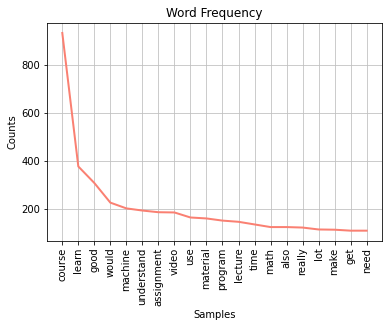

In [ ]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(Final_copy)):
    all_words = all_words + Final_copy['reviews'][i]
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

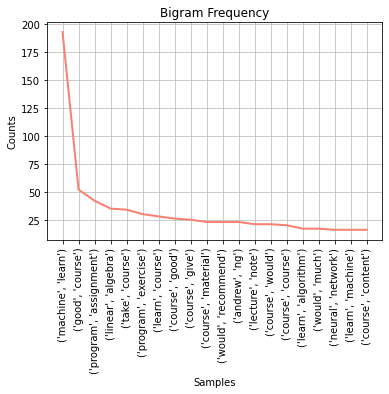

In [ ]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [ ]:
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[extremely, basic, course, machine, learn, bui...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[course, ok, certification, procedure, messno,...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[start, week, admit, good, course, explain, id...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[course, absolute, garbage, get, feedback, qui...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[however, good, material, lecture, may, use, o...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


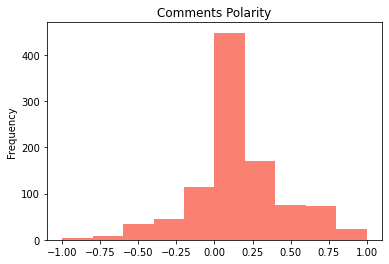

In [ ]:
#Get sentiment from comments
Final_copy2 = Final_copy.copy()
Final_copy2['reviews'] = [str(thing) for thing in Final_copy2['reviews']]
sentiment = []
for i in range(len(Final_copy)):
    blob = TextBlob(Final_copy2['reviews'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
Final_copy2['reviews']=sentiment
#Plot
Final_copy2['reviews'].plot.hist(color='salmon', title='Comments Polarity')

In [ ]:
Final_copy['reviews']=Final_copy['reviews'].apply(str)
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['extremely', 'basic', 'course', 'machine', 'l...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'ok', 'certification', 'procedure',...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['start', 'week', 'admit', 'good', 'course', '...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'absolute', 'garbage', 'get', 'feed...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['however', 'good', 'material', 'lecture', 'ma...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [ ]:
tokenized_reviews = Final_copy['reviews'].apply(lambda x: x.split())
print(tokenized_reviews[10])

["['would',", "'recommend',", "'take',", "'course',", "'course',", "'show',", "'age',", "'lot',", "'concept',", "'simply',", "'doesnt',", "'apply',", "'consider',", "'fast',", "'field',", "'change']"]


In [ ]:
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['extremely', 'basic', 'course', 'machine', 'l...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'ok', 'certification', 'procedure',...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['start', 'week', 'admit', 'good', 'course', '...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'absolute', 'garbage', 'get', 'feed...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['however', 'good', 'material', 'lecture', 'ma...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)

In [ ]:
print(dictionary)

Dictionary(2343 unique tokens: ["'abandon',", "'algebra',", "'altogether',", "'application',", "'arduous',"]...)


In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [ ]:
lda_model.print_topics()

[(0,
  '0.048*"\'course\'," + 0.018*"\'learn\'," + 0.012*"\'octave\'," + 0.011*"\'use\'," + 0.010*"\'content\'," + 0.009*"[\'course\'," + 0.008*"\'assignment\'," + 0.008*"\'machine\'," + 0.008*"\'good\'," + 0.008*"\'apply\',"'),
 (1,
  '0.018*"\'good\'," + 0.018*"\'course\'," + 0.016*"\'machine\'," + 0.016*"\'learn\'," + 0.012*"\'would\'," + 0.008*"[\'course\'," + 0.008*"\'great\'," + 0.008*"\'really\'," + 0.008*"\'people\'," + 0.008*"\'problem\',"'),
 (2,
  '0.038*"\'course\'," + 0.012*"\'would\'," + 0.011*"\'understand\'," + 0.009*"\'learn\'," + 0.009*"\'material\'," + 0.008*"\'machine\'," + 0.008*"\'work\'," + 0.007*"\'time\'," + 0.007*"\'ml\'," + 0.007*"\'also\',"'),
 (3,
  '0.029*"\'course\'," + 0.019*"\'learn\'," + 0.015*"\'assignment\'," + 0.012*"\'machine\'," + 0.010*"[\'good\'," + 0.009*"\'program\'," + 0.008*"\'line\'," + 0.008*"\'confuse\'," + 0.008*"\'take\'," + 0.008*"\'would\',"'),
 (4,
  '0.024*"\'course\'," + 0.013*"\'learn\'," + 0.011*"\'material\'," + 0.011*"\'lot\',"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
documents = Final_copy['reviews']
  
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(documents)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

In [ ]:
svd_matrix

array([[ 0.18929718, -0.19820636,  0.02927352, ..., -0.11298879,
         0.05587569,  0.06896442],
       [ 0.07053185, -0.06701484, -0.0104453 , ..., -0.03513541,
         0.0040505 , -0.13209868],
       [ 0.27194765, -0.1592001 , -0.00184436, ..., -0.04635382,
        -0.06223611, -0.06676685],
       ...,
       [ 0.07262079, -0.05616205, -0.00439044, ...,  0.04444602,
         0.03155633,  0.00332093],
       [ 0.2174878 , -0.19503359, -0.08527518, ..., -0.02741557,
        -0.02443547, -0.00327503],
       [ 0.13438755, -0.16762675, -0.13403748, ...,  0.00965184,
        -0.00974763,  0.00186393]])

In [ ]:
# Visualize the topics
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

     |████████████████████████████████| 1.7 MB 23.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=028eaa93900d771b92d22c7769a3f08b86a540ecd4bf5854586e4ab2a9e569c6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.033941 -0.001043       1        1  22.416661
0     -0.034114 -0.033526       2        1  17.921218
6      0.019719 -0.022036       3        1  16.459027
3     -0.076417 -0.084214       4        1  14.747855
1     -0.051015 -0.035982       5        1  12.416375
4     -0.029535  0.192956       6        1   8.520072
5      0.205302 -0.016155       7        1   7.518793, topic_info=               Term        Freq       Total Category  logprob  loglift
168       'octave',   70.000000   70.000000  Default  30.0000  30.0000
128      'lecture',  128.000000  128.000000  Default  29.0000  29.0000
40          'much',   89.000000   89.000000  Default  28.0000  28.0000
188      'content',   50.000000   50.000000  Default  27.0000  27.0000
2295       ['good']   18.000000   18.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
250   'background',    7.768114   49.970152   Topic7  -5.3556   0.7264
49          'quiz',    8.060632   72.043690   Topic7  -5.3186   0.3975
728         'part',    7.770079   56.343864   Topic7  -5.3553   0.6066
9          'basic',    7.769981   63.720849   Topic7  -5.3553   0.4835
129         'math',    7.769977  105.337233   Topic7  -5.3553  -0.0191

[540 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1501      1  0.863495     'ability',
364       3  0.872897  'absolutely',
246       1  0.217298    'actually',
246       3  0.217298    'actually',
246       4  0.108649    'actually',
...     ...       ...            ...
245       2  0.161669      ['would',
245       4  0.323337      ['would',
245       5  0.161669      ['would',
245       6  0.377227      ['would',
356       1  0.922888             []

[1028 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 4, 2, 5, 6])

In [ ]:
import os
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(7))

if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(7) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.033941 -0.001043       1        1  22.416631
0     -0.034114 -0.033526       2        1  17.921226
6      0.019719 -0.022036       3        1  16.459035
3     -0.076417 -0.084214       4        1  14.747856
1     -0.051015 -0.035982       5        1  12.416384
4     -0.029535  0.192956       6        1   8.520087
5      0.205302 -0.016155       7        1   7.518781, topic_info=               Term        Freq       Total Category  logprob  loglift
168       'octave',   70.000000   70.000000  Default  30.0000  30.0000
128      'lecture',  128.000000  128.000000  Default  29.0000  29.0000
40          'much',   89.000000   89.000000  Default  28.0000  28.0000
188      'content',   50.000000   50.000000  Default  27.0000  27.0000
2295       ['good']   18.000000   18.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
250   'background',    7.768101   49.970163   Topic7  -5.3556   0.7264
49          'quiz',    8.060619   72.043656   Topic7  -5.3186   0.3975
728         'part',    7.770067   56.343880   Topic7  -5.3553   0.6066
9          'basic',    7.769968   63.720845   Topic7  -5.3553   0.4835
129         'math',    7.769964  105.337229   Topic7  -5.3553  -0.0191

[540 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1501      1  0.863496     'ability',
364       3  0.872897  'absolutely',
246       1  0.217298    'actually',
246       3  0.217298    'actually',
246       4  0.108649    'actually',
...     ...       ...            ...
245       2  0.161668      ['would',
245       4  0.323337      ['would',
245       5  0.161668      ['would',
245       6  0.377226      ['would',
356       1  0.922889             []

[1028 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 4, 2, 5, 6])